In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

import ConstructPortfolio as cp #this will allow us to modularize the code!
#using "ConstructPortfolio.py" that is stored in the same directory! 
#(not using "ConstructPortfolio.ipynb")


/Users/bardiafarajnejad/Desktop/1st Half MFE/AFP/Final Delivery/MFE Group 16 AFP Code


# O'Neil feedback: look to combine price_target with STDEV, say price_target increases BUT see the difference between low dispersion and high dipersion when price_target increases !!!



In [2]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['pricetarget'].notna()].reset_index(drop=True).copy()
data = data[data['pricetargetsstandarddeviation'].notna()].reset_index(drop=True).copy()

#Z-score >1 or <-1
data['buy_tomorrow'] = np.where(data['pricetarget'].diff(1)/data['pricetargetsstandarddeviation'] > 1, 1, 0)
data['sell_tomorrow'] = np.where(data['pricetarget'].diff(1)/data['pricetargetsstandarddeviation'] < -1, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  3935
Total number of Sells:  2244
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  42  problems for buying

There are  35  problems for selling
Total number of Buys:  3893
Total number of Sells:  2209

There are  32  problems for buying

There are  23  problems for selling
Total number of Buys:  67321
Total number of Sells:  39508

There are  26  problems for buying

There are  19  problems for selling
Total number of Buys:  51903
Total number of Sells:  30242

There are  17  problems for buying

There are  15  problems for selling
Total number of Buys:  35653
Total number of Sells:  20633

There are  10  problems for buying

There are  9  problems for selling
Total number of Buys:  18500
Total number of Sells:  10626

There are  0  problems for buying

There are  0  problems for selling
Total number of Buys:  3891
Total number of Sells:  2207



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.470
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0220
Time:                        18:00:18   Log-Likelihood:                 3876.1
No. Observations:                2161   AIC:                            -7738.
Df Residuals:                    2154   BIC: 

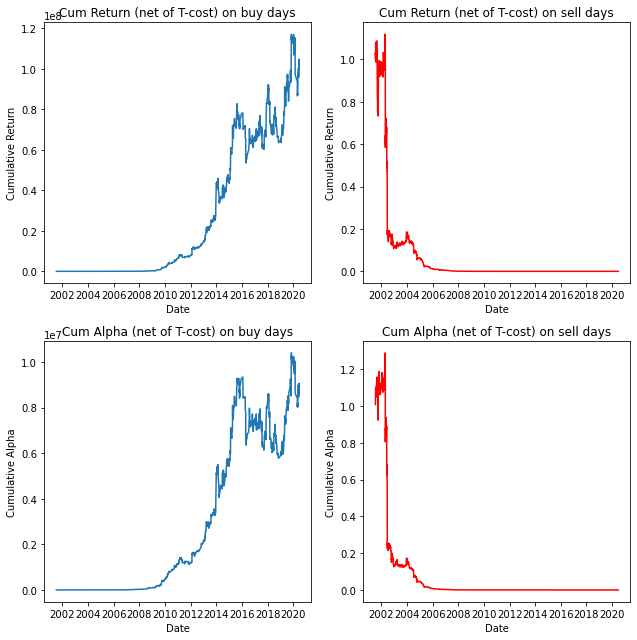

In [3]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.187
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0414
Time:                        18:00:33   Log-Likelihood:                 9505.9
No. Observations:                3988   AIC:                        -1.900e+04
Df Residuals:                    3981   BIC: 

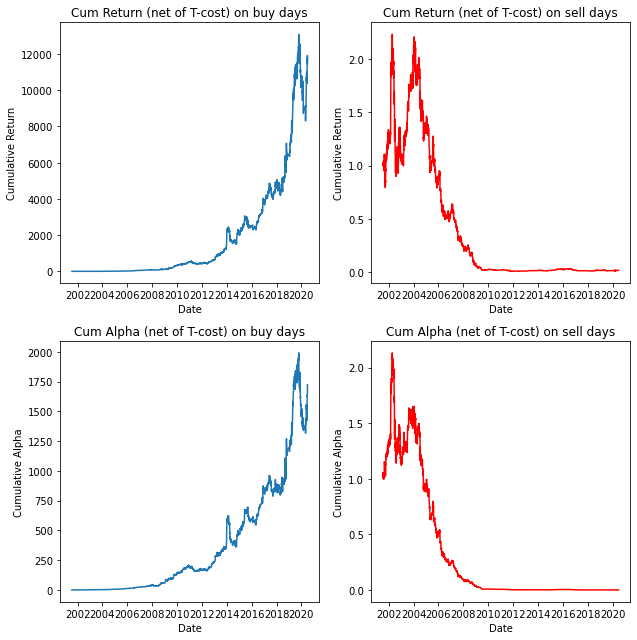

In [4]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.111
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0489
Time:                        18:00:51   Log-Likelihood:                 11131.
No. Observations:                4448   AIC:                        -2.225e+04
Df Residuals:                    4441   BIC: 

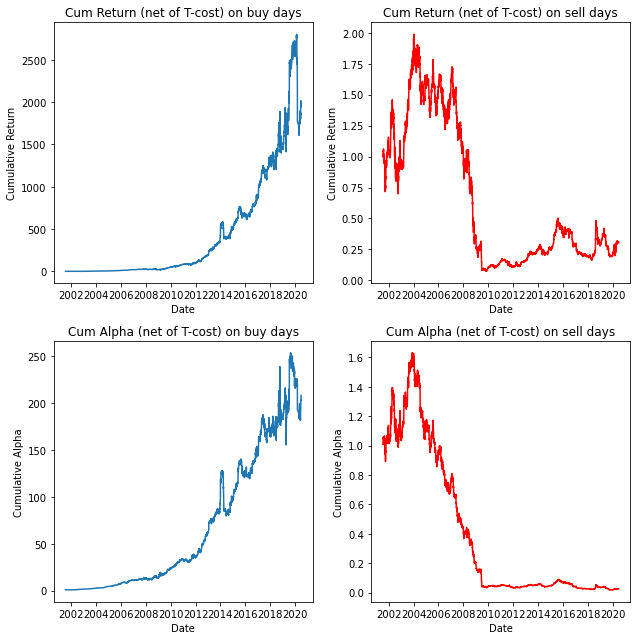

In [5]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.585
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00151
Time:                        18:01:17   Log-Likelihood:                 11692.
No. Observations:                4602   AIC:                        -2.337e+04
Df Residuals:                    4595   BIC: 

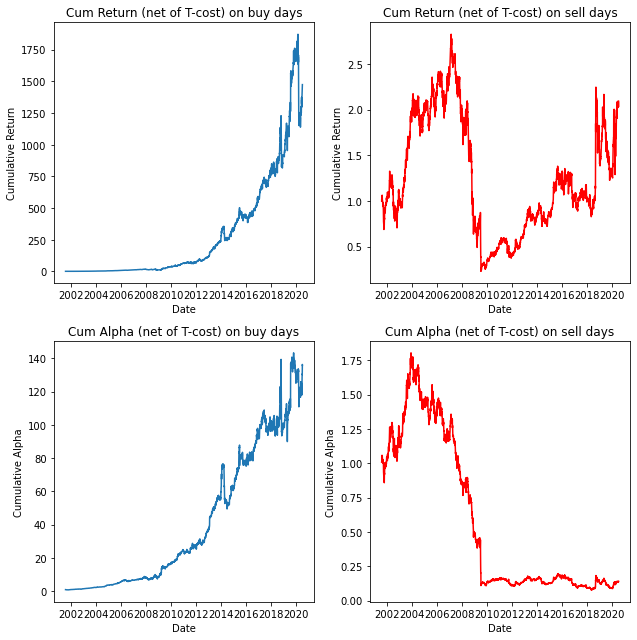

In [6]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.048
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.75e-07
Time:                        18:01:43   Log-Likelihood:                 11947.
No. Observations:                4673   AIC:                        -2.388e+04
Df Residuals:                    4666   BIC: 

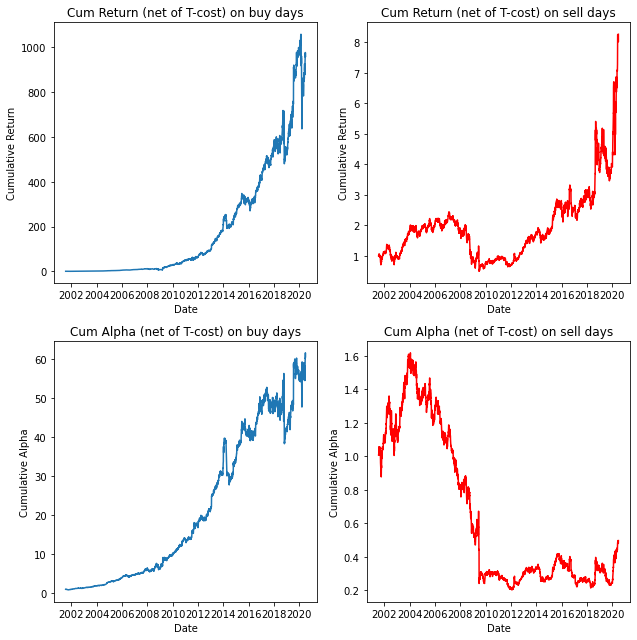

In [7]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)